<font size = 6> Линейная регрессия

Выполнил:
Иванов Роман Ильич
ММБ-004

Цель работы — предсказание стоимости коттеджа по его площади и другим
характеристик с помощью линейной модели регрессионного анализа.

<font size = 4> Описание переменных

PRICE — стоимость коттеджа в тысячах долларов США.

HOUSE — площадь коттеджа в квадратных метрах.

AREA — площадь участка в сотках.

DIST — расстояние от расположения коттеджа до кольцевой автомобильной дороги в
километрах.

ECO — индикатор, принимающий значение 1, если рядом с коттеджем есть река или
озеро, и значение 0 в противном случае.

# Введение

Импортируем нужные нам библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import math
import scipy

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, r2_score, explained_variance_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

Загрузим данные

In [ ]:
df = pd.read_excel("ML.ds3.xlsx", "V(46)", header=1)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


Выведем часть данных

In [ ]:
df.head()

,Price,House,Area,Dist,Eco
0,17.0,56,8.0,85.0,0
1,30.0,80,8.0,25.0,1
2,220.0,500,40.0,26.0,1
3,95.0,530,19.0,23.0,0
4,45.0,350,7.0,25.0,0


# Подготовка данных

Выделим отдельно целевую переменную и исходные признаки

In [ ]:
X = df.drop(['Price'], axis=1)
Y = df['Price']

Разделим данные на обучающую (80%) и тестовую (20%) части

In [ ]:
test_size = 0.20
r_state = 54
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=r_state)
X_test

,House,Area,Dist,Eco
45,46,15.0,100.0,0
36,36,6.0,65.0,0
29,285,15.0,74.0,0
10,65,6.0,25.0,0
38,170,15.0,30.0,1
26,180,17.0,86.0,0
41,350,18.0,30.0,1
21,210,20.0,19.0,0
32,130,6.0,12.0,0
14,60,8.0,51.0,0


In [ ]:
y_test

45      7.0
36      6.0
29     47.0
10     20.0
38    135.0
26     27.0
41    230.0
21     85.0
32     27.0
14     16.5
Name: Price, dtype: float64

# Обучение модели

Создадим модель линейной регрессии

In [ ]:
linear_regressor = LinearRegression(fit_intercept=True)

Обучаем модель на наших данных

In [ ]:
m1 = linear_regressor.fit(X_train, y_train)

Посмотрим на результат обучения. Оценки коэффициентов перед признаками

In [ ]:
m1.coef_

array([ 0.14830502,  3.74415323, -0.90295269, 32.54221438])

Оценка свободного коэффициента

In [ ]:
m1.intercept_

20.11685439166537

# Тестирование и оценка качества

## Оценка качества модели на обучающей выборке

Выполним предсказание с помощью функции predict

In [ ]:
prediction_train = m1.predict(X_train)
prediction_train

array([ 16.86278247,  92.73863768,  79.6221869 ,  69.1466443 ,
         9.33278728, 111.71992191,  -7.19408498, 191.48371185,
        68.51066622, -24.42435834, 190.42634243,  15.2963548 ,
        -6.36530456,  71.9028792 ,  21.47731367, 149.08951582,
       103.72129757,  53.90375821, 134.62932068, 191.68080364,
       176.29339506,  85.55550472, 119.88370898,  53.18955561,
       -22.88313792,  63.19229008,  75.65886762, 123.06135453,
        56.81736844,  51.54047919, 168.95119929, -18.37581705,
       147.18383475,  88.18059315, 152.86139762, 253.10093935,
        88.86958454,  40.35770529])

Вычислим остатки

In [ ]:
residual = (y_train - prediction_train)
residual

44     -0.362782
46     17.261362
35     15.377813
27    -27.146644
8       7.167213
31    -52.719922
42     22.194085
12    -91.483712
19    -30.510666
40     34.424358
39    124.573658
11      4.703645
28     11.865305
1     -41.902879
18     -7.477314
3     -54.089516
43     26.278702
25    -38.903758
24    -54.629321
37    -71.680804
16    123.706605
34     10.444495
20    -34.883709
22    -25.189556
30     27.883138
13    -54.692290
4     -30.658868
6     -28.061355
9     -31.817368
17      8.459521
7     -48.951199
0      35.375817
33    122.816165
23     -5.180593
15    167.138602
2     -33.100939
5      31.130415
47    -27.357705
Name: Price, dtype: float64

Построим диаграмму остатков

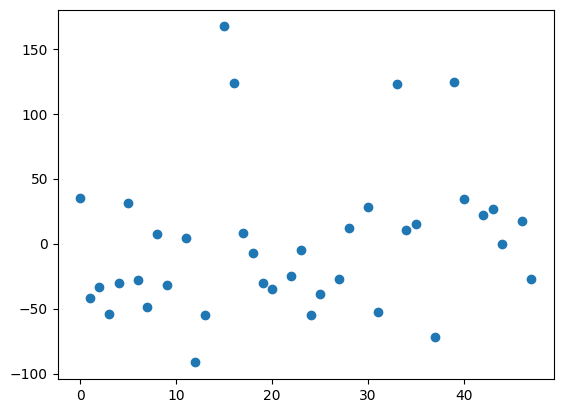

In [ ]:
plt.scatter(residual.index, residual)

Из диаграммы видно, что имеется несколько больших остатков. Значит, качество модели на обучающей выборке является невысоким.

Вычислим коэффицент детерминации

In [ ]:
r2_m1 = r2_score(y_train, prediction_train)
r2_m1

0.5933768765627409

Относительно низкая величина коэффицента детерминации подтверждает вывод о невысоком качестве модели на обучающей выборке

Вычислим метрику MAPE - mean absolute percentage error, с помощью функции mean_absolute_percentage_error

In [ ]:
mape_m1 = mean_absolute_percentage_error(y_train, prediction_train)*100
mape_m1

106.82719197541641

Вычислим метрику MSE - mean squared error, с помощью функции mean_squared_error

In [ ]:
mse_m1 = mean_squared_error(y_train, prediction_train)
mse_m1

3136.2168498759424

Вычислим метрику MAE - mean absolute error, с помощью функции mean_absolute_error

In [ ]:
mae_m1 = mean_absolute_error(y_train, prediction_train)
mae_m1

41.62110001600884

## Оценка качества модели на тестовой выборке

Выполним предсказание с помощью функции predict

In [ ]:
prediction_test = m1.predict(X_test)
prediction_test

array([ -7.19408498, -10.77117018,  51.72758528,  29.64778302,
       106.9446404 ,  32.80843213, 144.87200412, 108.98787265,
        51.02599443,  12.91779446])

Вычислим остатки

In [ ]:
residual1 = (y_test - prediction_test)
residual1

45    14.194085
36    16.771170
29    -4.727585
10    -9.647783
38    28.055360
26    -5.808432
41    85.127996
21   -23.987873
32   -24.025994
14     3.582206
Name: Price, dtype: float64

Построим диаграмму остатков

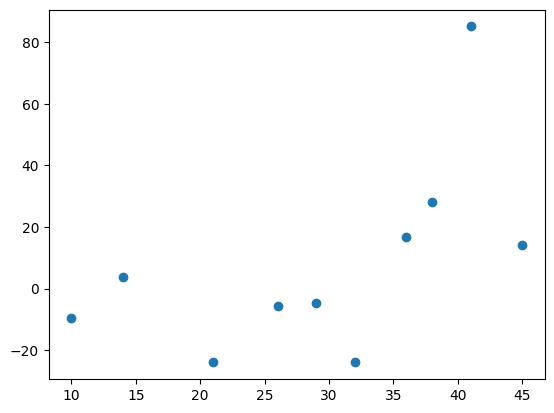

In [ ]:
plt.scatter(residual1.index, residual1)

Из диаграммы видно, что имеется только один большой остаток. Значит, качество модели на тестовой выборке можно считать близким к высокому.

Вычислим коэффицент детерминации

In [ ]:
r2test_m1 = r2_score(y_test, prediction_test)
r2test_m1

0.789543990384451

Относительно высокая величина коэффицента детерминации показывает, что качестве модели на тестовой выборке близко к высокому.

Вычислим метрику MAPE - mean absolute percentage error, с помощью функции mean_absolute_percentage_error

In [ ]:
mapetest_m1 = mean_absolute_percentage_error(y_test, prediction_test)*100
mapetest_m1

75.88129121195874

Вычислим метрику MSE - mean squared error, с помощью функции mean_squared_error

In [ ]:
msetest_m1 = mean_squared_error(y_test, prediction_test)
msetest_m1

983.1289385782917

Вычислим метрику MAE - mean absolute error, с помощью функции mean_absolute_error

In [ ]:
maetest_m1 = mean_absolute_error(y_test, prediction_test)
maetest_m1

21.592848369433476

Выделим значения метрик на обучающей и тестовых выборках в отдельную таблицу

In [ ]:
ind = ['R2', 'MAPE', 'MSE', 'MAE']
dat1 = [r2_m1, mape_m1, mse_m1, mae_m1]
dat2 = [r2test_m1, mapetest_m1, msetest_m1, maetest_m1]

pd.DataFrame({
    'Metrics': ind,
    'Train': dat1,
    'Test': dat2
})

,Metrics,Train,Test
0,R2,0.593377,0.789544
1,MAPE,106.827192,75.881291
2,MSE,3136.216850,983.128939
3,MAE,41.621100,21.592848


Исходя из этих данных можно сказать, что модель недообучена, т.к. cредняя абсолютная процентная ошибка(MAPE) на тестовой выборке меньше, чем на обучающей выборке и также коэффицент детерминации(R2) выше на тестовой выборке.

# Улучшение качества модели

## Очистка данных

Построим диаграмму boxplot для признаков

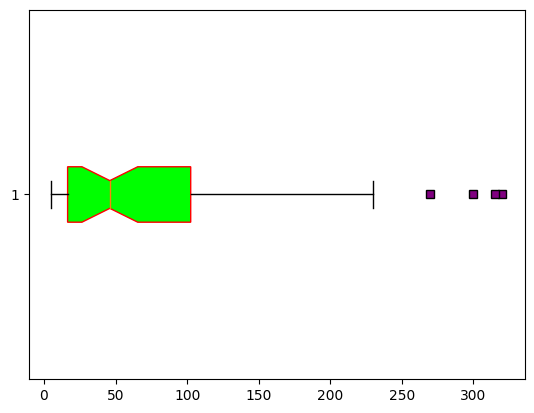

In [ ]:
box = plt.boxplot(df.Price, vert = False, notch = True, patch_artist = True,
                  flierprops = dict(markerfacecolor = 'purple', marker = 's'),
                  boxprops = dict(color = 'red', facecolor = 'lime' ))

Удалим аномальные данные

In [ ]:
df.query('Price > 250')

,Price,House,Area,Dist,Eco
15,320.0,300,15.0,0.5,1
16,300.0,400,22.0,20.0,1
33,270.0,350,15.0,15.0,1
39,315.0,450,25.0,25.0,1


In [ ]:
df2 = df.drop(index = [15, 16, 33, 39])

In [ ]:
df2.shape

(44, 5)

## Обучение модели

Выделим отдельно целевую переменную и исходные признаки

In [ ]:
X2 = df2.drop(['Price'], axis=1)
y2 = df2['Price']

Обучаем модель на наших данных

In [ ]:
m2 = linear_regressor.fit(X2, y2)

Выполним предсказание с помощью функции predict

In [ ]:
prediction2 = m2.predict(X2)
prediction2

array([-3.62836428e+00,  5.56554275e+01,  2.05508928e+02,  1.16703720e+02,
        5.69659628e+01,  6.84979733e+01,  9.46393213e+01,  1.34886205e+02,
        1.55060490e+01,  4.72747630e+01,  2.70807342e+01,  1.71136880e+01,
        1.39280854e+02,  5.58478735e+01,  1.76227953e+01,  4.11055841e+01,
        2.43431193e+01,  5.15922173e+01,  9.95100383e+01,  9.30058284e+01,
        4.02730615e+01,  7.87055689e+01,  1.08607258e+02,  4.56556978e+01,
        3.86207088e+01,  5.89585456e+01,  8.46459306e+00,  4.87434882e+01,
       -4.64952855e+00,  8.37352103e+01,  4.10853026e+01,  7.16276875e+01,
        6.74764700e+01, -1.70934512e-01,  1.57864128e+02,  8.53258627e+01,
       -3.81814184e+00,  1.12457953e+02,  1.06379486e+01,  8.34631710e+01,
        2.69176427e+01,  1.06379486e+01,  7.09646610e+01,  3.24029792e+01])

Вычислим остатки

In [ ]:
residual2 = (y2 - prediction2)
residual2

0      20.628364
1     -25.655427
2      14.491072
3     -21.703720
4     -11.965963
5      51.502027
6       0.360679
7     -14.886205
8       0.993951
9     -22.274763
10     -7.080734
11      2.886312
12    -39.280854
13    -47.347873
14     -1.122795
17     18.894416
18    -10.343119
19    -13.592217
20    -14.510038
21     -8.005828
22    -12.273062
23      4.294431
24    -28.607258
25    -30.655698
26    -11.620709
27    -16.958546
28     -2.964593
29     -1.743488
30      9.649529
31    -24.735210
32    -14.085303
34     24.372313
35     27.523530
36      6.170935
37    -37.864128
38     49.674137
40     13.818142
41    117.542047
42      4.362051
43     46.536829
44    -10.417643
45     -3.637949
46     39.035339
47    -19.402979
Name: Price, dtype: float64

Вычислим коэффицент детерминации

In [ ]:
r2_m2 = r2_score(y2, prediction2)
r2_m2

0.7158690063766855

Относительно высокая величина коэффицента детерминации показывает, что качество модели на обучающей выборке близко к высокому.

## Очистка данных 2

Удалим данные с большим остатком

In [ ]:
df3 = df2.drop(index = [5, 13, 38, 41, 43])

In [ ]:
df3.shape

(39, 5)

Выделим отдельно целевую переменную и исходные признаки

In [ ]:
X3 = df3.drop(['Price'], axis=1)
y3 = df3['Price']

Обучаем модель на наших данных

In [ ]:
m3 = linear_regressor.fit(X3, y3)

Выполним предсказание с помощью функции predict

In [ ]:
prediction3 = m3.predict(X3)
prediction3

array([ -0.79171019,  41.71802065, 189.24114375, 109.52968684,
        51.20504449,  77.37899495, 119.33262252,  16.824319  ,
        34.874822  ,  26.54516269,  17.05545382, 115.85597695,
        18.76697105,  38.24779818,  14.3984573 ,  37.25743603,
        96.58419689,  91.87878576,  26.42924897,  78.47378672,
        94.48861663,  33.89919667,  40.7248109 ,  45.87377189,
        12.377616  ,  47.93890598,  -0.6097287 ,  76.41033305,
        38.70007159,  68.87466746,  65.77802644,   1.74492954,
       144.08582759,   1.04587694,  15.59783655,  30.49932245,
        15.59783655,  55.67080452,  19.49505957])

Вычислим остатки

In [ ]:
residual3 = (y3 - prediction3)
residual3

0     17.791710
1    -11.718021
2     30.758856
3    -14.529687
4     -6.205044
6     17.621005
7      0.667377
8     -0.324319
9     -9.874822
10    -6.545163
11     2.944546
12   -15.855977
14    -2.266971
17    21.752202
18    -0.398457
19     0.742564
20   -11.584197
21    -6.878786
22     1.570751
23     4.526213
24   -14.488617
25   -18.899197
26   -13.724811
27    -3.873772
28    -6.877616
29    -0.938906
30     5.609729
31   -17.410333
32   -11.700072
34    27.125333
35    29.221974
36     4.255070
37   -24.085828
40     8.954123
42    -0.597837
44   -13.999322
45    -8.597837
46    54.329195
47    -6.495060
Name: Price, dtype: float64

Вычислим коэффицент детерминации

In [ ]:
r2_m3 = r2_score(y3, prediction3)
r2_m3

0.8783242330769016

Величина коэффицента детерминации больше 0.8, будем считать качество модели достаточно хорошим

## Оценка качества модели на обучающей выборке

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=test_size, random_state=r_state)

Обучаем модель на наших данных

In [ ]:
m3 = linear_regressor.fit(X_train, y_train)

Посомтрим на результат обучения. Оценки коэффициентов перед признаками

In [ ]:
m3.coef_

array([ 0.08198115,  3.51330644, -0.56643816,  6.48448763])

Оценка свободного коэффициента

In [ ]:
m3.intercept_

15.13393575724593

Выполним предсказание с помощью функции predict

In [ ]:
prediction_train = m3.predict(X_train)
prediction_train

array([ 40.07406548,  33.64665393,  56.52732869,  19.27091013,
       142.77830489,   2.34661558,  34.98807171,  18.10236054,
       119.54164028,  42.1224127 , 112.30868775,  70.33678802,
        97.47307732,  12.09769113,  40.90307015,  39.95468237,
        49.28173541,  94.11982748,  54.25952792,  29.94161492,
        66.55550119, 119.20335859,  27.381595  ,  91.85378024,
        17.40528057,  -0.31591173,   0.76892803,  46.66606324,
        37.83114972, 188.41386185,  79.16132691])

Вычислим остатки

In [ ]:
residual3_train = (y_train - prediction_train)
residual3_train

32   -13.074065
25   -18.646654
46    53.472671
14    -2.770910
37   -22.778305
36     3.653384
9     -9.988072
11     1.897639
12   -19.541640
1    -12.122413
3    -17.308688
34    25.663212
20   -12.473077
28    -6.597691
26   -13.903070
17    20.045318
29    -2.281735
24   -14.119827
4     -9.259528
44   -13.441615
35    28.444499
7      0.796641
10    -7.381595
21    -6.853780
8     -0.905281
0     17.315912
40     9.231072
27    -4.666063
19     0.168850
2     31.586138
6     15.838673
Name: Price, dtype: float64

Построим диаграмму остатков

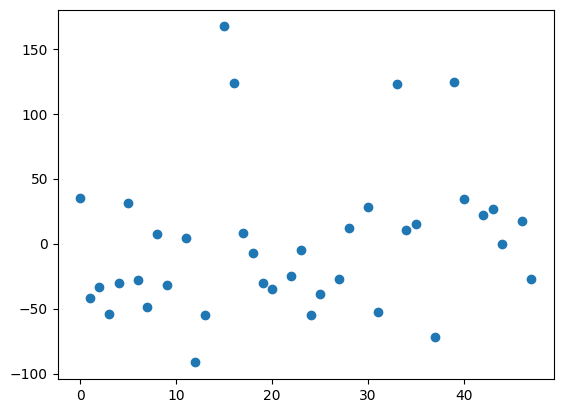

In [ ]:
plt.scatter(residual.index, residual)

Исходя из диаграммы видно, что остатки достаточно небольшие. Значит, качество модели на обучающей выборке является высоким

Вычислим коэффицент детерминации с помощью функции

In [ ]:
r2_m3 = r2_score(y_train, prediction_train)
r2_m3

0.8665243749524545

Величина коэффицента детерминации больше 0.8, будем считать качество модели достаточно хорошим

Вычислим метрику MAPE - mean absolute percentage error, с помощью функции mean_absolute_percentage_error

In [ ]:
mape_m3 = mean_absolute_percentage_error(y_train, prediction_train)*100
mape_m3

36.58864089251945

Вычислим метрику MSE - mean squared error, с помощью функции mean_squared_error

In [ ]:
mse_m3 = mean_squared_error(y_train, prediction_train)
mse_m3

301.3171262181547

Вычислим метрику MAE - mean absolute error, с помощью функции mean_absolute_error

In [ ]:
mae_m3 = mean_absolute_error(y_train, prediction_train)
mae_m3

13.426710338671889

## Оценка качества модели на тестовой выборке

Выполним предсказание с помощью функции predict

In [ ]:
prediction3_test = m3.predict(X_test)
prediction3_test

array([14.96084959, -0.59330331, 79.60113792, 20.11503448, 14.20422904,
       78.60204882, 27.11067969, 14.96084959])

Вычислим остатки

In [ ]:
residual3_test = (y_test - prediction3_test)
residual3_test

45    -7.960850
30     5.593303
31   -20.601138
47    -7.115034
18    -0.204229
23     4.397951
22     0.889320
42     0.039150
Name: Price, dtype: float64

Построим диаграмму остатков

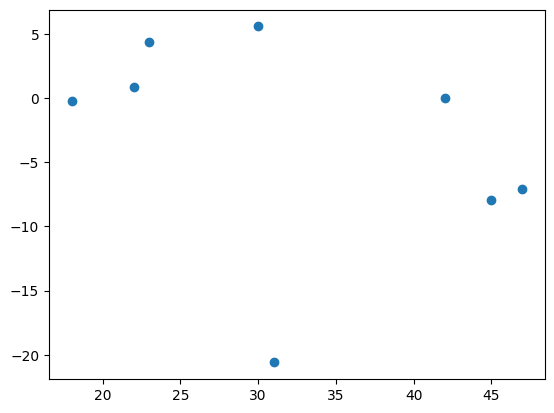

In [ ]:
plt.scatter(residual3_test.index, residual3_test)

Исходя из диаграммы, имеется малое количество больших остатков. Значит, качество модели на тестовой выборке является высоким

Вычислим коэффицент детерминации с помощью функции

In [ ]:
r2test_m3 = r2_score(y_test, prediction3_test)
r2test_m3

0.8936410250749809

Величина коэффицента детерминации больше 0.8, будем считать качество модели достаточно хорошим

Вычислим метрику MAPE - mean absolute percentage error, с помощью функции mean_absolute_percentage_error

In [ ]:
mapetest_m3 = mean_absolute_percentage_error(y_test, prediction3_test)*100
mapetest_m3

40.679421020124

Вычислим метрику MSE - mean squared error, с помощью функции mean_squared_error

In [ ]:
msetest_m3 = mean_squared_error(y_test, prediction3_test)
msetest_m3

73.73335936676948

Вычислим метрику MAE - mean absolute error, с помощью функции mean_absolute_error

In [ ]:
maetest_m3 = mean_absolute_error(y_test, prediction3_test)
maetest_m3

5.850122030415852

In [ ]:
ind = ['R2', 'MAPE', 'MSE', 'MAE']
m3_metrics = [r2_m3, mape_m3, mse_m3, mae_m3]
m3_test_metrics = [r2test_m3, mapetest_m3, msetest_m3, maetest_m3]

pd.DataFrame({
    'Metrics': ind,
    'Train': m3_metrics,
    'Test': m3_test_metrics
})

,Metrics,Train,Test
0,R2,0.866524,0.893641
1,MAPE,36.588641,40.679421
2,MSE,301.317126,73.733359
3,MAE,13.426710,5.850122


Исходя из этиз данных нельзя сказать получилась модель переобученной или недообученной, т.к. cредняя абсолютная процентная ошибка(MAPE) на обучающей выборке меньше, чем на тестовой, но коэффициент детерминации(R2) выше на тестовой выборке.

# Заключение

Цель работы — предсказание стоимости коттеджа по его площади и другим характеристик с помощью линейной модели регрессионного анализа.

Использованные пакеты: numpy, pandas, matplotlib, seaborn, sklearn.

В работе мы разделили данные на обучающую и тестовые выборки, построили модель линейной регрессии и оценили ее качество с помощью различных метрик. Затем мы провели анализ выборки и удалили из нее аномальные данные с целью улучшения качества модели. Выбросив данные с большими остатками, мы получили коэффицент детерминации равный 0.8783242330769016. В итоге модель получилась и не дообученной, и не переобученной.